In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [48]:
dataset=pd.read_csv('Company_Data.csv')

In [3]:
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
dataset.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


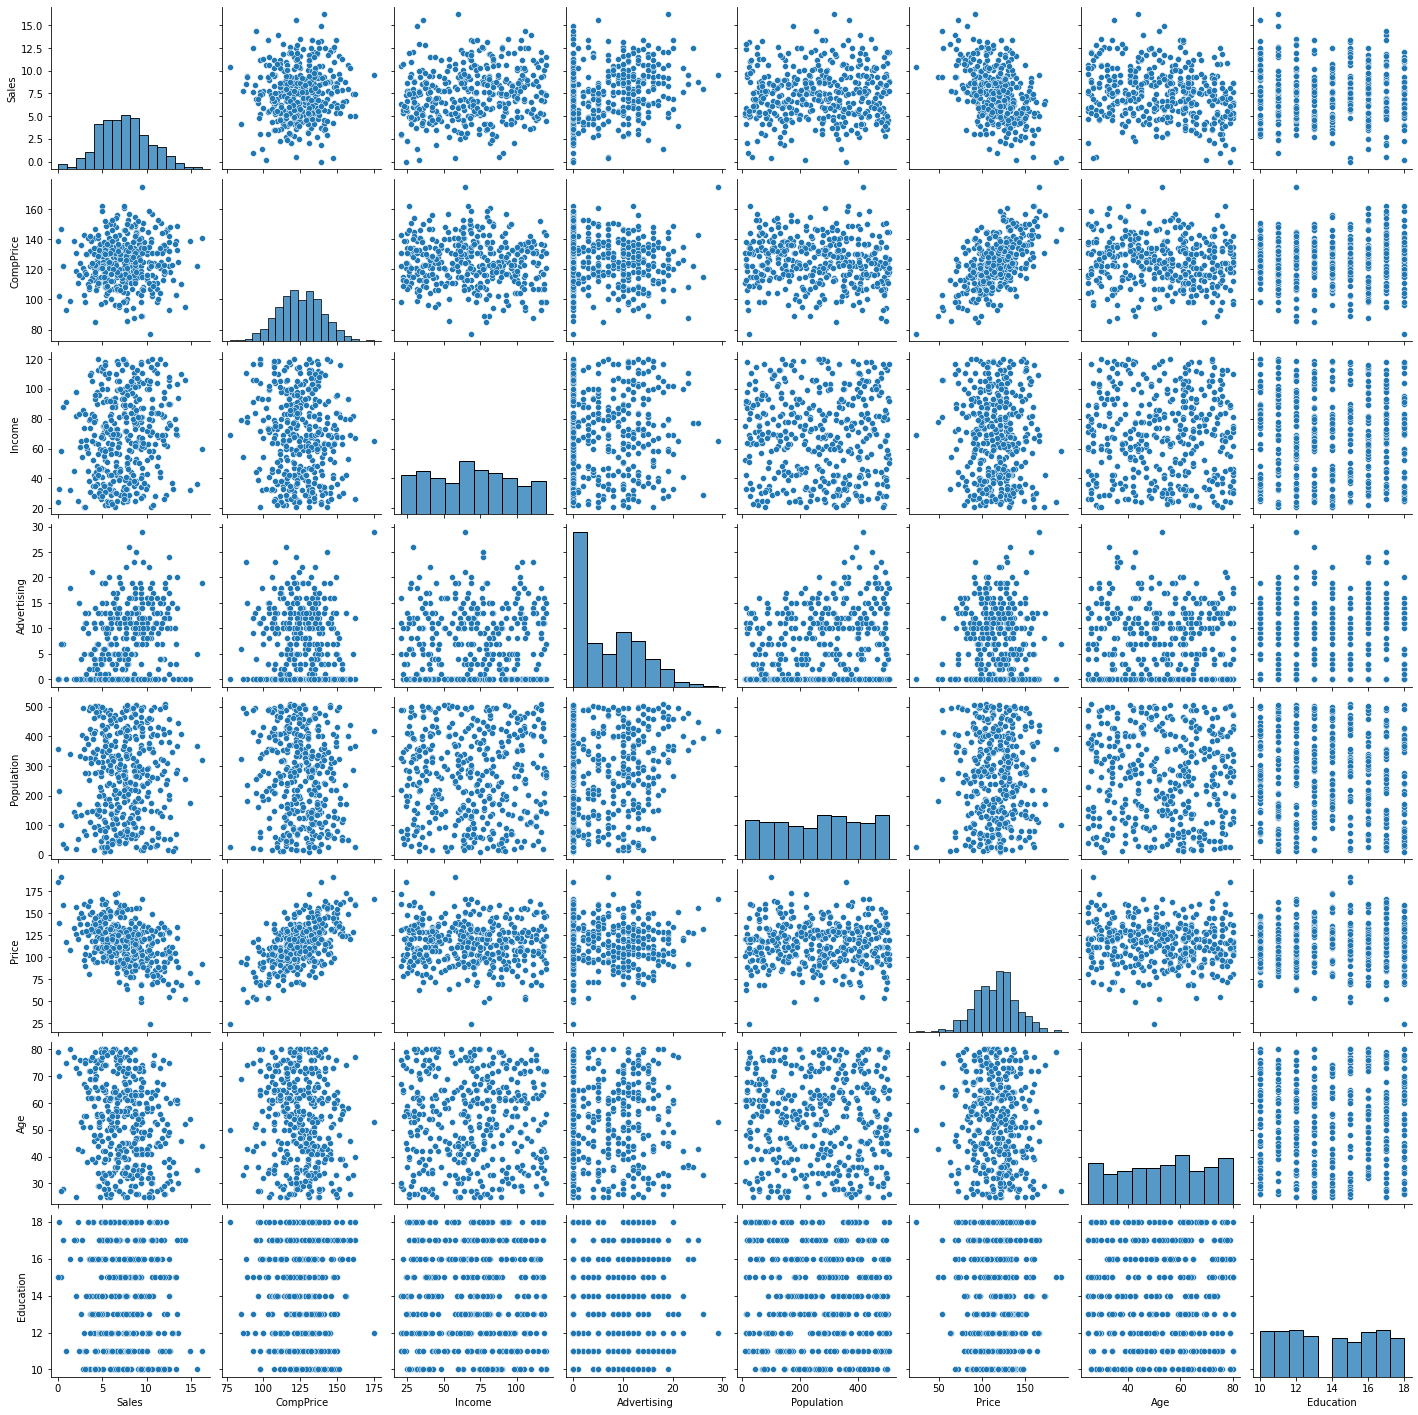

In [6]:
sns.pairplot(dataset)

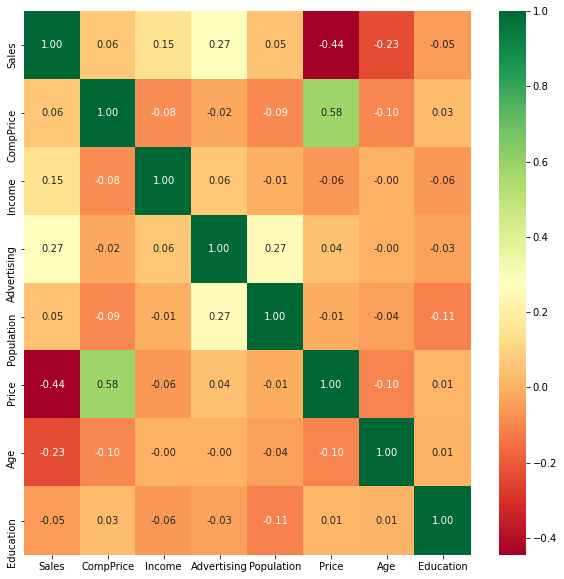

In [7]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn",fmt='.2f')

In [8]:
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
dataset['Sales'].max()

16.27

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


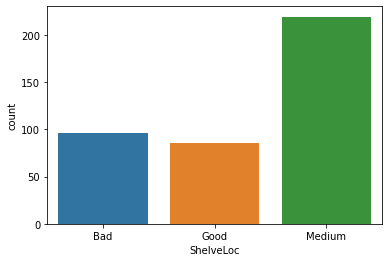

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


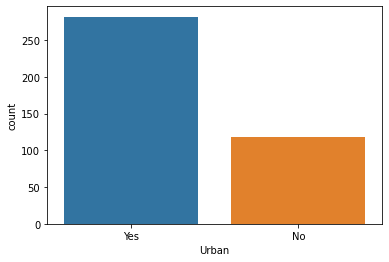

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


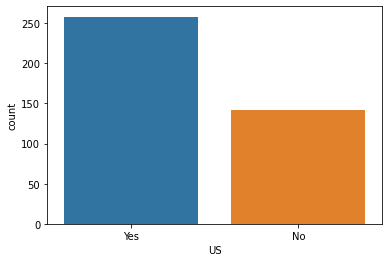

In [10]:
sns.countplot(dataset['ShelveLoc'])
plt.show()

sns.countplot(dataset['Urban'])
plt.show()

sns.countplot(dataset['US'])
plt.show()

### Converting Sales to Categorical 

In [49]:
# Converting Sales to categorical using pd.cut
dataset['Sales']=pd.cut(x=dataset['Sales'],bins=[0,6,12,17],labels=['Low','Medium','High'],right=False)
dataset['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

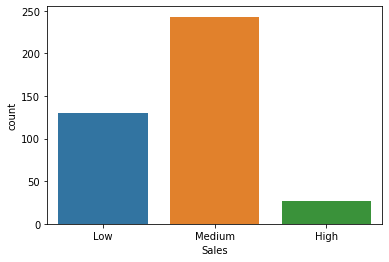

In [12]:
sns.countplot(dataset['Sales'])

In [13]:
dataset['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

### Feature Scaling (Without converting other columns to category)

In [50]:
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [51]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [52]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [57]:
x=pd.get_dummies(X)

In [58]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


### Converting other attributes into categories

In [15]:
dataset.describe() # here we get the min and max value for all numerical data in order to create bins of 3 category

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


### Converting remaining data to categorical

In [16]:
dataset['CompPrice']=pd.cut(x=dataset['CompPrice'],bins=[77,100,135,176],labels=['Low','Medium','High'],right=False)
dataset['Income']=pd.cut(x=dataset['Income'],bins=[21,43,70,121],labels=['Low','Medium','High'],right=False)
dataset['Advertising']=pd.cut(x=dataset['Advertising'],bins=[0,10,20,30],labels=['Low','Medium','High'],right=False)
dataset['Population']=pd.cut(x=dataset['Population'],bins=[10,170,340,509],labels=['Low','Medium','High'],right=False)
dataset['Price']=pd.cut(x=dataset['Price'],bins=[24,64,128,192],labels=['Low','Medium','High'],right=False)
dataset['Age']=pd.cut(x=dataset['Age'],bins=[25,45,60,81],labels=['Low','Medium','High'],right=False)
dataset['Education']=pd.cut(x=dataset['Education'],bins=[10,12.5,15,19],labels=['Low','Medium','High'],right=False)

In [17]:
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,Low,Yes,Yes
2,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,High,High,Bad,Low,Medium,Yes,No


### Encoding data

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
dataset['Sales']=le.fit_transform(dataset['Sales'])
dataset['CompPrice']=le.fit_transform(dataset['CompPrice'])
dataset['Income']=le.fit_transform(dataset['Income'])
dataset['Advertising']=le.fit_transform(dataset['Advertising'])
dataset['Population']=le.fit_transform(dataset['Population'])
dataset['Price']=le.fit_transform(dataset['Price'])
dataset['ShelveLoc']=le.fit_transform(dataset['ShelveLoc'])
dataset['Age']=le.fit_transform(dataset['Age'])
dataset['Education']=le.fit_transform(dataset['Education'])
dataset['Urban']=le.fit_transform(dataset['Urban'])
dataset['US']=le.fit_transform(dataset['US'])

In [20]:
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,0,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


In [21]:
X=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [23]:
X_train

array([[2, 2, 1, ..., 1, 0, 0],
       [2, 0, 1, ..., 2, 1, 0],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 1, 0, 1],
       [2, 1, 1, ..., 0, 1, 1],
       [2, 1, 1, ..., 1, 1, 1]])

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

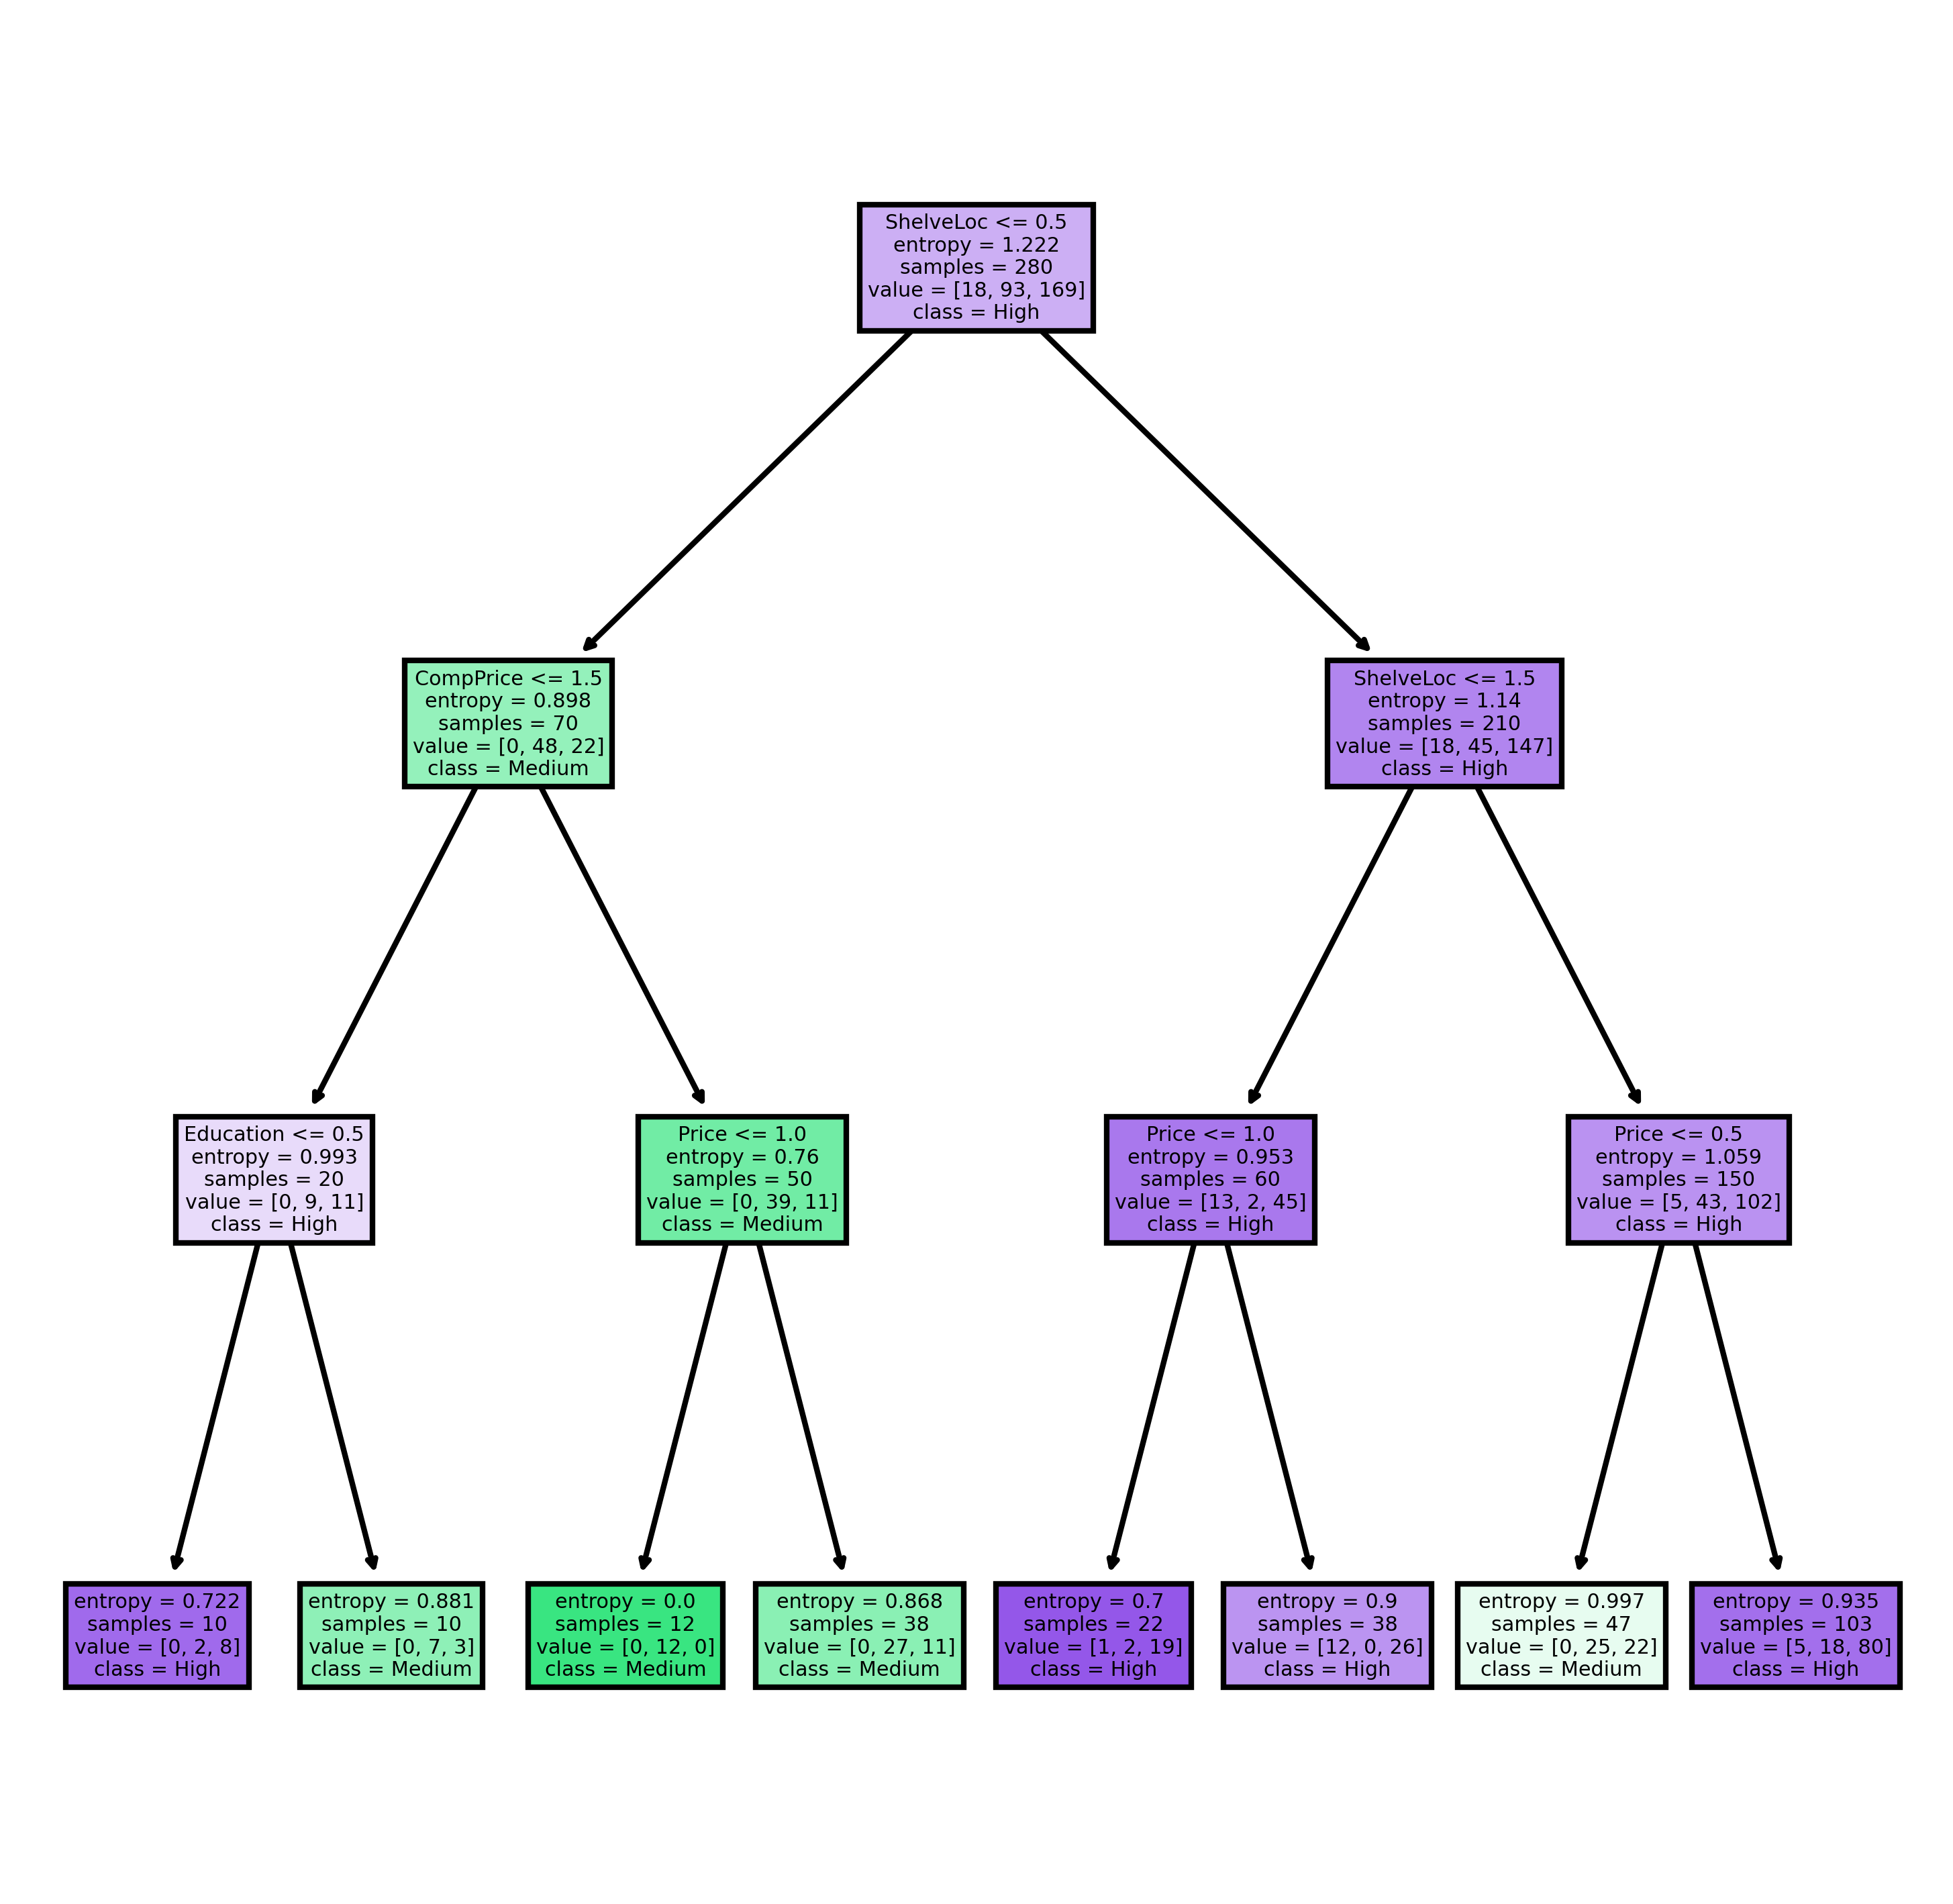

In [25]:
from sklearn import tree
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [26]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [2 1]
 [2 2]
 [1 1]
 [2 1]
 [2 1]
 [2 0]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [1 1]
 [2 1]
 [1 2]
 [2 2]
 [1 2]
 [1 1]
 [2 1]
 [1 2]
 [2 0]
 [2 2]
 [2 2]
 [2 0]
 [2 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 2]
 [2 2]
 [2 0]
 [2 2]
 [2 2]
 [2 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [2 2]
 [1 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [2 1]
 [2 1]
 [1 1]
 [2 2]
 [2 2]
 [1 2]
 [1 2]
 [1 2]
 [2 2]
 [2 0]
 [2 2]
 [2 1]
 [2 2]
 [1 2]
 [2 0]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [2 0]
 [2 2]
 [1 1]
 [2 1]
 [2 2]
 [2 1]
 [2 2]
 [2 0]]


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  0  9]
 [ 0 23 14]
 [ 0 20 54]]


0.6416666666666667